In [1]:
import pandas as pd 
import numpy as np

import scipy.stats as stats #qq plots
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [2]:
df=pd.read_csv("train.csv",usecols=["Age","Fare","Survived"])


In [3]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [4]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [5]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [6]:
x=df.iloc[:,1:3]
y=df.iloc[:,0]

In [7]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

/var/folders/zk/yt14z40j2lb2lz548fqr3v9m0000gn/T/ipykernel_17587/1464535364.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train["Age"])


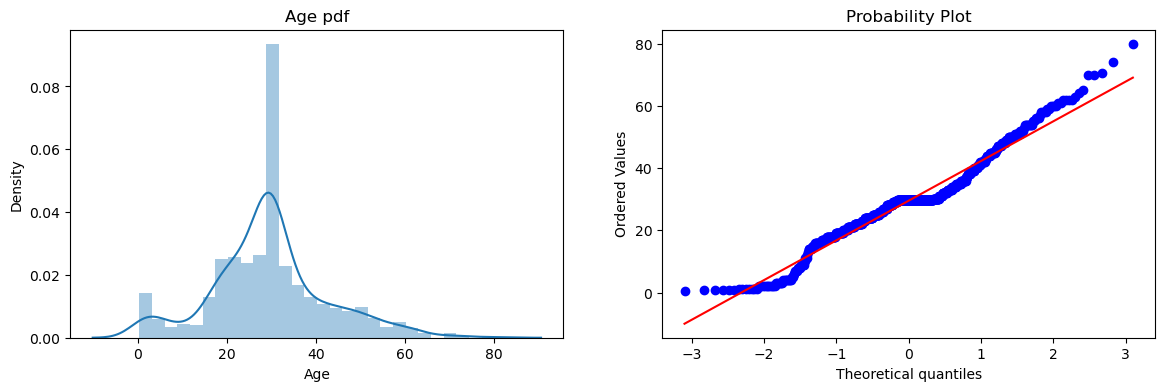

In [8]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train["Age"])
plt.title("Age pdf")

plt.subplot(122)
stats.probplot(X_train["Age"],dist="norm",plot=plt)
plt.show("Age qq plot")

/var/folders/zk/yt14z40j2lb2lz548fqr3v9m0000gn/T/ipykernel_17587/3133100553.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train["Fare"])


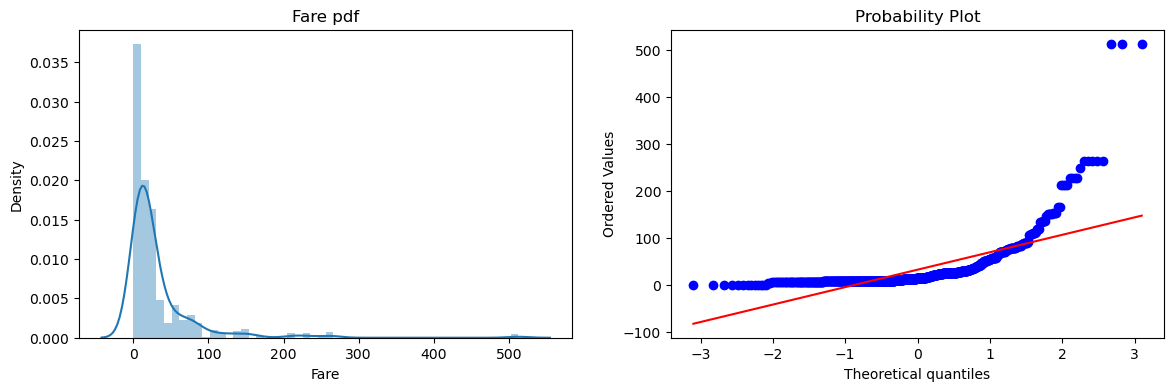

In [9]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train["Fare"])
plt.title("Fare pdf")

plt.subplot(122)
stats.probplot(X_train["Fare"],dist="norm",plot=plt)
plt.show("Fare qq plot")

In [10]:
clf=LogisticRegression()
clf2=DecisionTreeClassifier()

In [11]:
clf.fit(X_train,y_train)
clf2.fit(X_train,y_train)

y_pred=clf.predict(X_test)
y_pred1=clf2.predict(X_test)


print("Accuracy lr",accuracy_score(y_test,y_pred))
print("Accuracy Dt",accuracy_score(y_test,y_pred1))

Accuracy lr 0.6480446927374302
Accuracy Dt 0.664804469273743


In [12]:
trf=FunctionTransformer(func=np.log1p) #np.log simply applies, if we have zero then it will prb ,np.log1, add 1 to ur data

In [13]:
X_train_transformed=trf.fit_transform(X_train)
X_test_transformed=trf.fit_transform(X_test)

In [14]:
clf=LogisticRegression()
clf2=DecisionTreeClassifier()

In [15]:
clf.fit(X_train_transformed,y_train)
clf2.fit(X_train_transformed,y_train)

y_pred=clf.predict(X_test_transformed)
y_pred1=clf2.predict(X_test_transformed)


print("Accuracy lr",accuracy_score(y_test,y_pred))
print("Accuracy Dt",accuracy_score(y_test,y_pred1))

Accuracy lr 0.6815642458100558
Accuracy Dt 0.6759776536312849


In [17]:
X_transformed=trf.fit_transform(x)

clf=LogisticRegression()
clf2=DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed,y,scoring='accuracy',cv=10)))
print("dt",np.mean(cross_val_score(clf2,X_transformed,y,scoring='accuracy',cv=10)))

LR 0.678027465667915
dt 0.6588389513108615


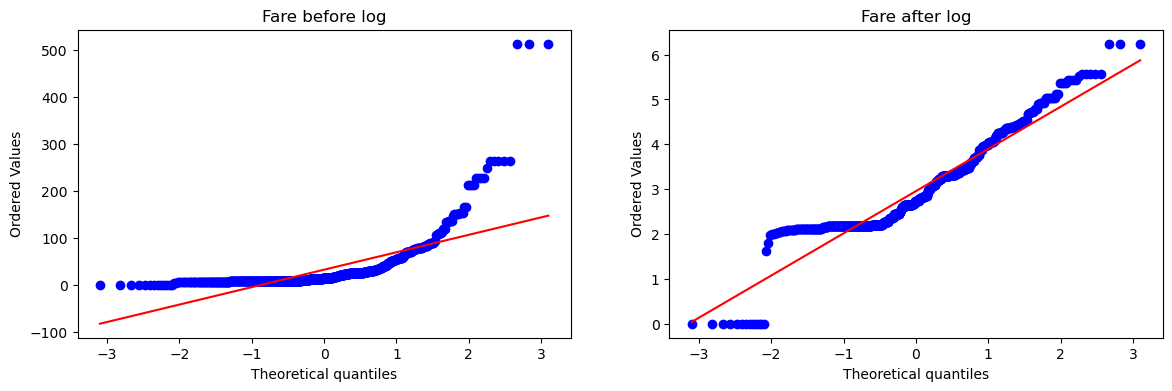

In [19]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(X_train["Fare"],dist="norm",plot=plt)
plt.title("Fare before log")

plt.subplot(122)
stats.probplot(X_train_transformed["Fare"],dist="norm",plot=plt)
plt.title("Fare after log")
plt.show()

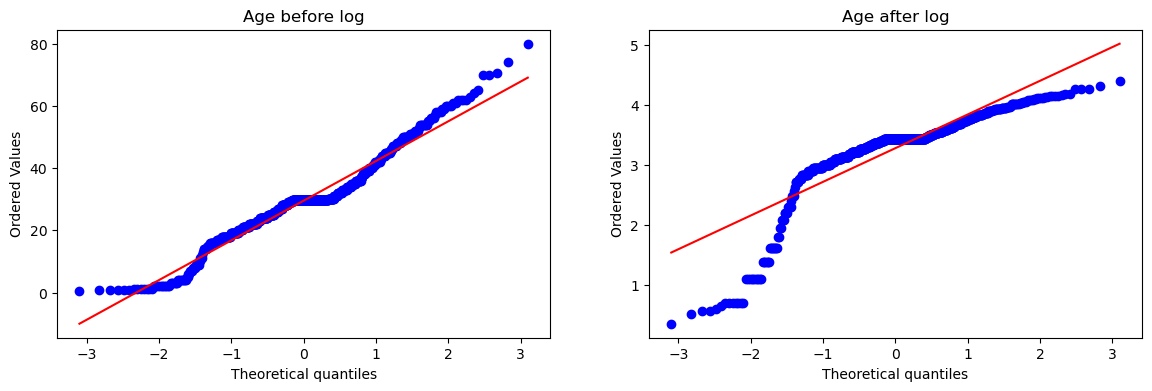

In [20]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(X_train["Age"],dist="norm",plot=plt)
plt.title("Age before log")

plt.subplot(122)
stats.probplot(X_train_transformed["Age"],dist="norm",plot=plt)
plt.title("Age after log")
plt.show()

In [21]:
trf2=ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')

X_train_transformed2=trf2.fit_transform(X_train)
X_test_transformed2=trf2.transform(X_test)

In [22]:
clf=LogisticRegression()
clf2=DecisionTreeClassifier()


clf.fit(X_train_transformed2,y_train)
clf2.fit(X_train_transformed2,y_train)

y_pred=clf.predict(X_test_transformed2)
y_pred1=clf2.predict(X_test_transformed2)


print("Accuracy lr",accuracy_score(y_test,y_pred))
print("Accuracy Dt",accuracy_score(y_test,y_pred1))

Accuracy lr 0.6703910614525139
Accuracy Dt 0.6927374301675978


In [23]:
X_transformed2=trf2.fit_transform(x)

clf=LogisticRegression()
clf2=DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed2,y,scoring='accuracy',cv=10)))
print("dt",np.mean(cross_val_score(clf2,X_transformed2,y,scoring='accuracy',cv=10)))

LR 0.6712609238451936
dt 0.6666916354556804


In [24]:
def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]
    
    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
    
    X_trans = trf.fit_transform(X)
    
    clf = LogisticRegression()
    
    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))
    
    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()
    

Accuracy 0.6589013732833957


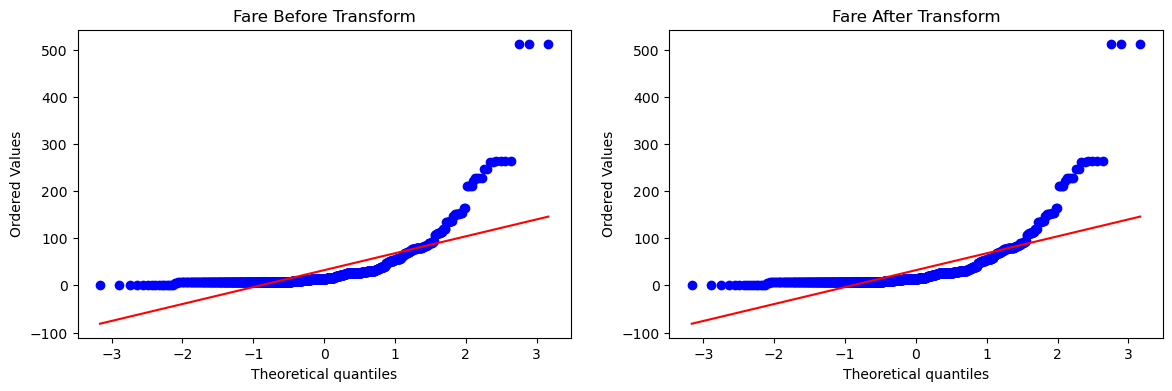

In [25]:
apply_transform(lambda x:x)

Accuracy 0.6442446941323345


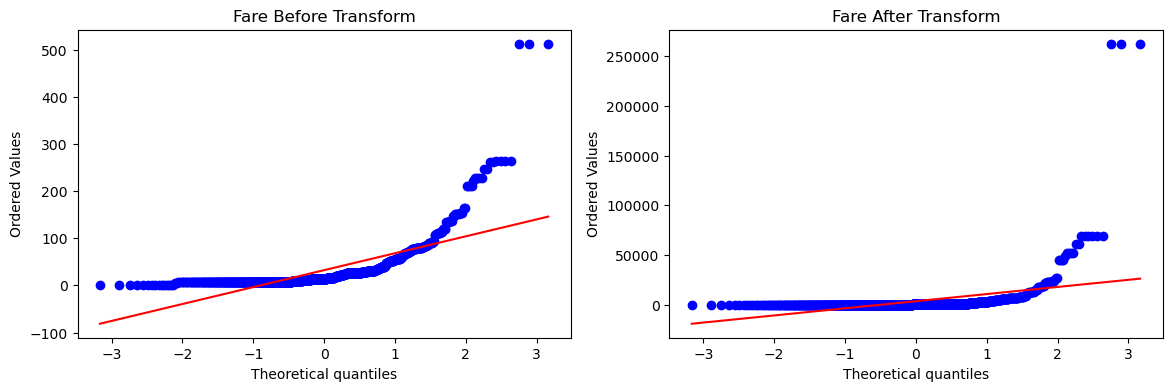

In [28]:
apply_transform(lambda x: x**2)

Accuracy 0.6589013732833957


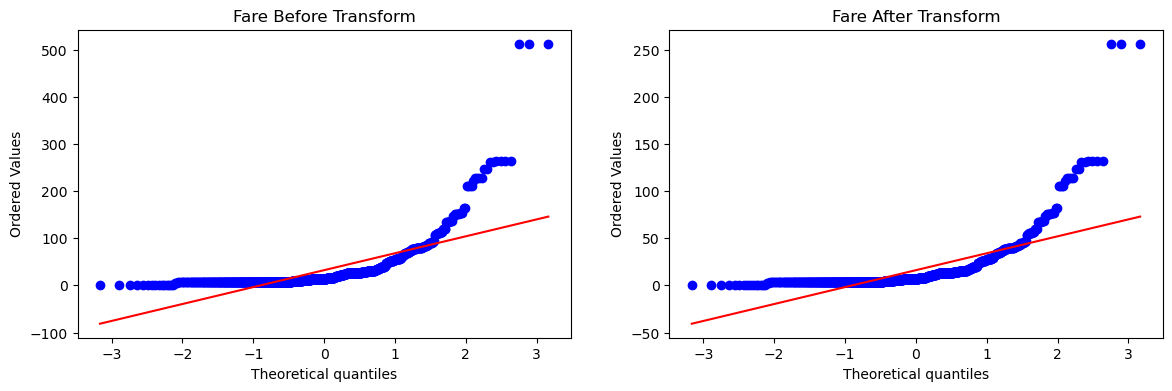

In [29]:
apply_transform(lambda x: x**1/2)

Accuracy 0.61729088639201


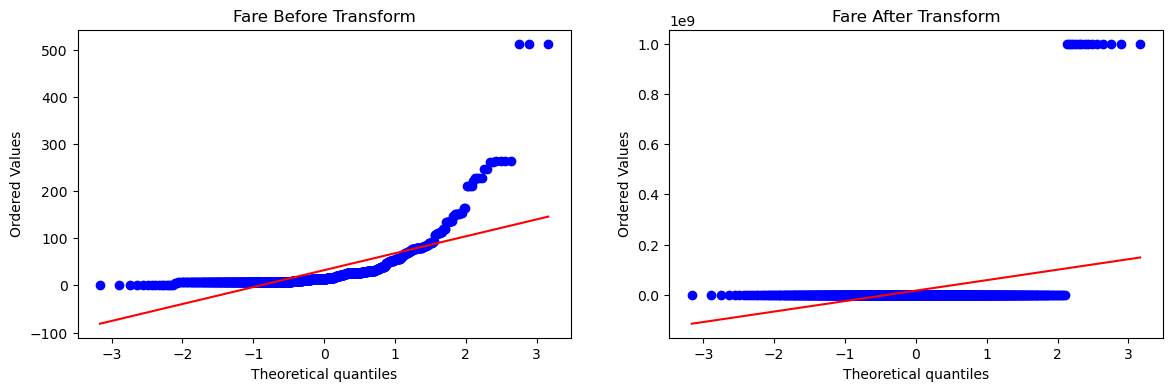

In [31]:
apply_transform(lambda x: 1/(x+0.000000001))

Accuracy 0.6184144818976279


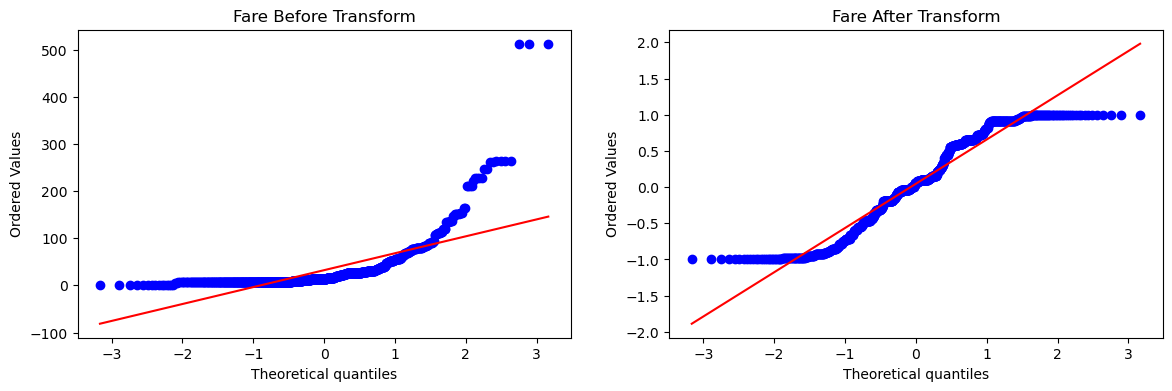

In [33]:
apply_transform(np.cos)

Accuracy 0.616167290886392


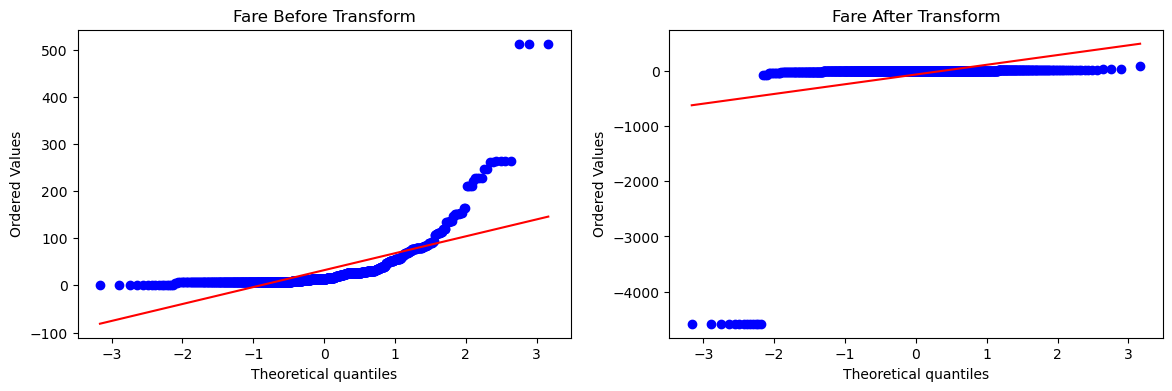

In [34]:
apply_transform(np.tan)